In [98]:
import pandas as pd
import matplotlib.pyplot as plt

In [99]:
df = pd.read_csv('h2o_results/orb_results.csv')

In [100]:
df

,num_atoms,num_parts,avg_part_size,num_mp,energy_error_abs,energy_error_pct,forces_error_max,forces_error_mae,forces_error_mape,forces_error_ratio,forces_error_mse,forces_error_rms,benchmark_time,all_partition_time,avg_partition_time
0,192,20,190.25,2,0.002258,0.000237,0.108709,0.006731,20.972255,0.033282,2.361979e-04,0.015369,10.044920,0.202219,0.010111
1,192,20,192.00,3,0.000366,0.000038,0.000666,0.000115,11.778239,0.000559,2.222621e-08,0.000149,0.009970,0.188689,0.009434
2,192,20,192.00,4,0.000122,0.000013,0.000444,0.000100,2.421903,0.000482,1.661426e-08,0.000129,0.009954,0.189208,0.009460
3,192,20,192.00,5,0.000061,0.000006,0.000559,0.000105,2.204076,0.000507,1.796504e-08,0.000134,0.009942,0.189121,0.009456
4,192,20,192.00,6,0.000000,0.000000,0.000553,0.000105,1.133805,0.000511,1.858794e-08,0.000136,0.010105,0.189023,0.009451
5,192,20,192.00,7,0.000122,0.000013,0.000616,0.000106,2.868686,0.000513,1.831785e-08,0.000135,0.009906,0.189024,0.009451
6,192,20,192.00,8,0.000061,0.000006,0.000580,0.000106,14.118420,0.000516,1.857288e-08,0.000136,0.009922,0.188821,0.009441
7,768,20,275.30,2,0.653076,0.017143,0.202773,0.025912,70.048916,0.126541,1.856693e-03,0.043089,0.275682,0.251174,0.012559
8,768,20,473.00,3,0.039062,0.001025,0.052355,0.005113,10.637090,0.024835,8.455242e-05,0.009195,0.011963,0.237990,0.011900
9,768,20,652.25,4,0.007812,0.000205,0.009210,0.000684,6.644635,0.003271,1.611196e-06,0.001269,0.012130,0.227358,0.011368


## Partitioning

In [109]:
df['avg_part_ratio'] = df['avg_part_size'] / df['num_atoms']
avg_by_mp = df.groupby('num_mp').mean()

Text(0, 0.5, 'Proportion of All Atoms')

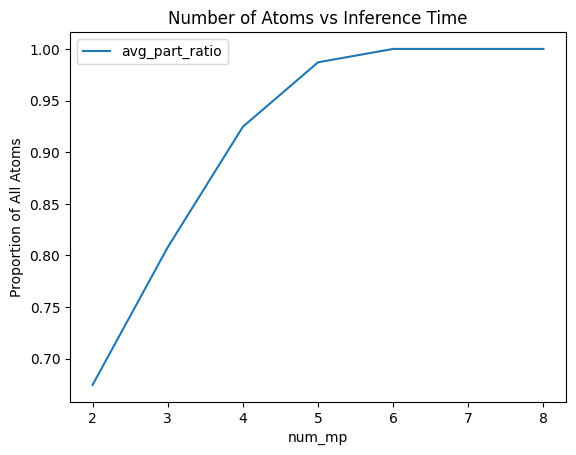

In [112]:
ax = avg_by_mp.plot(y=['avg_part_ratio'])
ax.set_title("Number of Atoms vs Inference Time")
ax.set_ylabel('Proportion of All Atoms')

## Timing

In [101]:
avg_by_num_atoms = df.groupby('num_atoms').mean()

Text(0, 0.5, 'Time (seconds)')

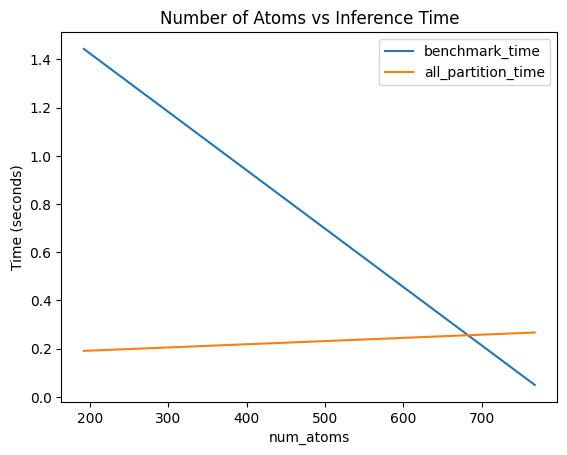

In [102]:
ax = avg_by_num_atoms.plot(y=['benchmark_time', 'all_partition_time'])
ax.set_title("Number of Atoms vs Inference Time")
ax.set_ylabel('Time (seconds)')

## Energy Error

In [103]:
avg_by_mp = df.groupby('num_mp').mean()

Text(0, 0.5, 'Energy (eV)')

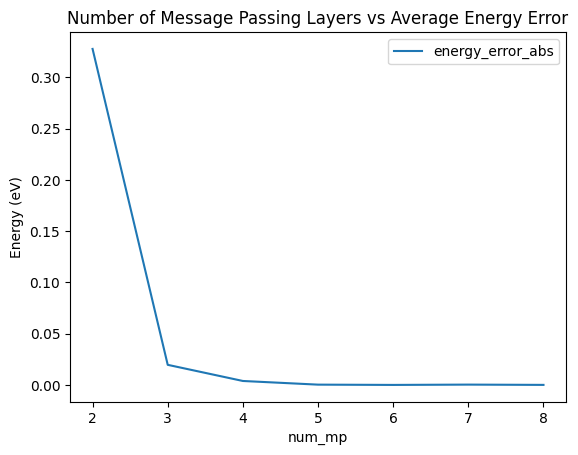

In [104]:
ax = avg_by_mp.plot(y=['energy_error_abs'])
ax.set_title("Number of Message Passing Layers vs Average Energy Error")
ax.set_ylabel("Energy (eV)")

Text(0, 0.5, 'Energy (eV)')

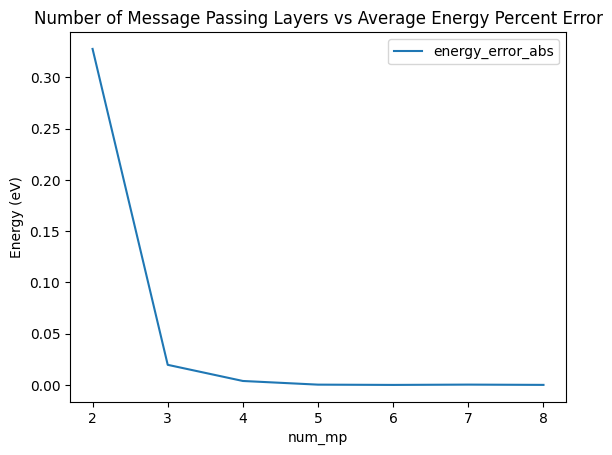

In [105]:
ax = avg_by_mp.plot(y=['energy_error_abs'])
ax.set_title("Number of Message Passing Layers vs Average Energy Percent Error")
ax.set_ylabel("Energy (eV)")

## Forces Error

Text(0, 0.5, 'Force (eV/A)')

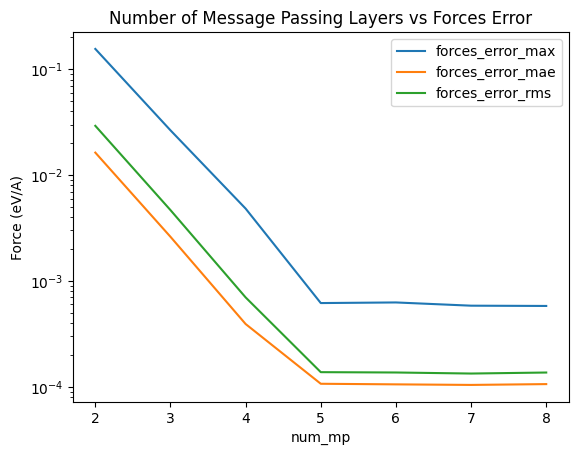

In [106]:
ax = avg_by_mp.plot(y=['forces_error_max', 'forces_error_mae', 'forces_error_rms'], logy=True)
ax.set_title("Number of Message Passing Layers vs Forces Error")
ax.set_ylabel("Force (eV/A)")

Text(0, 0.5, 'Force (eV/A)')

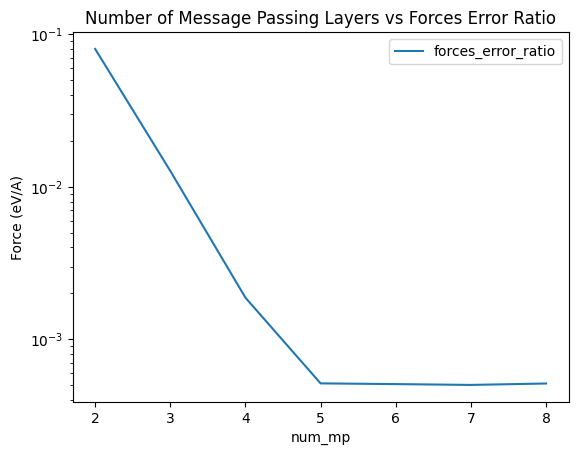

In [107]:
ax = avg_by_mp.plot(y=['forces_error_ratio'], logy=True)
ax.set_title("Number of Message Passing Layers vs Forces Error Ratio")
ax.set_ylabel("Force (eV/A)")